<img style="float: left;" src="D2Klogo.png" width="20%"> 

<center>

# Welcome to COMP 680 #
### Statistics for Computing and Data Science ###

### Week 6 Hypothesis Testing I###

In [1]:
### standard imports
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['patch.force_edgecolor'] = True

import random
random.seed(2023)

## Swain vs. Alabama ##

In [ ]:
pop_p = 0.26
observed_stat = 8 # 8 black on a 100 people panel

In [ ]:
n = 100
np.random.binomial(n, p=pop_p)

In [ ]:
# Simulation
simu_stats = []
# rep is the number of samples to draw from population, the more the better
rep = 10000
# n is the sample size, this has to be the same as the observed data
n = 100

for i in np.arange(rep):
    # draw from binomial distribution, why?
    one_simu_stat = np.random.binomial(n, p=0.26)
    # save one_simu_stat to the list of simu_stats
    simu_stats = np.append(simu_stats, one_simu_stat)
    
# what does each number of simu_stats represent?    
simu_stats

In [ ]:
# Visualize the sampling distribution under the null
plt.hist(simu_stats, bins=20, alpha=0.4)
# plot the hight of the red dot at 20 with a size 50 to be visible
plt.scatter(observed_stat, 20, color='red', s=50);

In [ ]:
# the proportion of simu_stat that is smaller than observed_stat
# why smaller???
# average of a boolean array is the proportion of 1s
np.mean(simu_stats <= observed_stat)

In [ ]:
# the 5th percentile of the simu_stat
# what does this cut_off mean?
cut_off = np.percentile(simu_stats, 5)
cut_off

In [ ]:
# Visualize the sampling distribution under the null
plt.hist(simu_stats, bins=20, alpha=0.4)
plt.plot([cut_off, cut_off], [0,1600], color='orange')
plt.scatter(observed_stat, 20, color='red', s=50)
plt.xlabel('sampling distribution of black jurors')
plt.title('One sample test for jury selection in Swain vs. Alabama');

## Mendel and Pea Flowers ##

In [ ]:
pop_p = 0.75
observed_stat = 705

In [ ]:
n = 929
np.random.binomial(n, p=pop_p)

In [ ]:
# Simulation
simu_stats = []
rep = 10000

for i in np.arange(rep):
    one_simu_stat = np.random.binomial(n, p=pop_p)
    simu_stats = np.append(simu_stats, one_simu_stat)

simu_stats

In [ ]:
plt.hist(simu_stats, bins=20, alpha=0.4)
plt.scatter(observed_stat, 20, color='red', s=50);

In [ ]:
# the 5th percentile of the simu_stat
# what does this cut_off mean?
cut_off_left = np.percentile(simu_stats, 2.5)
cut_off_right = np.percentile(simu_stats, 97.5)
[cut_off_left, cut_off_right]

In [ ]:
plt.hist(simu_stats, bins=20, alpha=0.4)
plt.plot([cut_off_left, cut_off_left], [0,1500], color='orange')
plt.plot([cut_off_right, cut_off_right], [0,1500], color='orange')
plt.scatter(observed_stat, 20, color='red', s=50)
plt.xlabel('sampling distribution of purple pea flowers')
plt.title("One sample test for Mendel's Genetic Model");

#### In this case, it is a two-sided test, and the p-values should be the two tail area probabilities:
 * want to find the probability of "more extreme" than observed 
 * "more extreme" in the sense of against null and supporting alternative
 * observed is 705 out of 929

In [ ]:
# exact 75% purple should be 929*0.75
expect = round(n*pop_p)
expect

In [ ]:
obs_stat_left = expect - abs(expect - observed_stat)
obs_stat_left

In [ ]:
reject = simu_stats[(simu_stats<cut_off_left) | (simu_stats>cut_off_right)]
reject

In [ ]:
extreme_than_observe = simu_stats[(simu_stats<obs_stat_left) | (simu_stats>observed_stat)]
extreme_than_observe

In [ ]:
plt.hist(simu_stats, bins=20, alpha=0.2)
plt.hist(reject, bins=20, alpha=0.2, color='yellow')
plt.hist(extreme_than_observe, bins=20, alpha=0.2, color='red')
plt.plot([cut_off_left, cut_off_left], [0,1500], color='orange')
plt.plot([cut_off_right, cut_off_right], [0,1500], color='orange')
plt.scatter(observed_stat, 20, color='red', s=50)
plt.plot([observed_stat, observed_stat], [0,1500], color='red')
plt.plot([obs_stat_left, obs_stat_left], [0,1500], color='red');

In [ ]:
p_value = np.mean(simu_stats >= observed_stat)*2
p_value

What do you think? It looks like the observed statistic is a very typical value from the sampling distribution. Therefore we fail to reject the null hypothesis.

## Student's lament ##

In [ ]:
# dataframe with 2 columns: section number and midterm grade
scores = pd.read_csv('scores_by_section.csv')
scores

In [ ]:
# count how many students in each section
scores.groupby(by='Section').count()

In [ ]:
# average midterm grades for each section
scores.groupby(by='Section').mean() # Group 3 is the lowest

In [ ]:
# section 3 count and average midterm grades
sec_3_size = 27
sec_3_mean = 13.67

In [ ]:
# take a random sample of 27 students from entire class
# without replacement because small population size
random_sample = scores.sample(sec_3_size, replace=False)
random_sample

In [ ]:
# what is the average grade for the random sample of 27 students?
np.mean(random_sample['Midterm'])

In [ ]:
# do the same for another random sample of 27
another_random_sample = scores.sample(sec_3_size, replace=False)
np.mean(another_random_sample['Midterm'])

In [ ]:
# simulate 5000 random samples of 27 students and calculate average grade
averages = []
rep = 10000

for i in np.arange(rep):
    random_sample = scores.sample(sec_3_size, replace=False)
    new_average = np.mean(random_sample['Midterm'])
    averages = np.append(averages, new_average) 

In [ ]:
# plot histogram of simulated 5000 averages
# compare to one observed average: the true average for section 3
plt.hist(averages, bins=20, alpha=0.4)
plt.scatter(sec_3_mean, 20, color='red', s=50);

In [ ]:
# proportion of the simulated average lower than true section 3 average 
# why smaller?
np.mean(averages <= sec_3_mean)

In [ ]:
# cut off the left tail at 5% to be reject region
cut_off = np.percentile(averages, 5)
print('observed statistic: ', sec_3_mean)
print('5th percentile of simulated statistic: ', cut_off)

In [ ]:
plt.hist(averages, bins=20, alpha=0.4)
plt.plot([cut_off,cut_off],[0,1500], color='orange')
plt.scatter(sec_3_mean, 20, color='red', s=50)
plt.xlabel('sampling distribution of average midterm grades')
plt.title('One sample test for comparing average midterm grades among sections');

# Permutation Test #

## Data on Birth weights

<img src="Kaiser.png" width="600px" />

In [2]:
# read in data
baby = pd.read_csv('baby.csv')
baby

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False
...,...,...,...,...,...,...
1169,113,275,27,60,100,False
1170,128,265,24,67,120,False
1171,130,291,30,65,150,True
1172,125,281,21,65,110,False


In [3]:
# take out the columns we want to work with
smoking_and_birthweight = baby[['Birth Weight', 'Maternal Smoker']]
smoking_and_birthweight

,Birth Weight,Maternal Smoker
0,120,False
1,113,False
2,128,True
3,108,True
4,136,False
...,...,...
1169,113,False
1170,128,False
1171,130,True
1172,125,False


In [4]:
# count how many babies in each group
smoking_and_birthweight.groupby(by='Maternal Smoker').count()

,Birth Weight
Maternal Smoker,
False,715
True,459


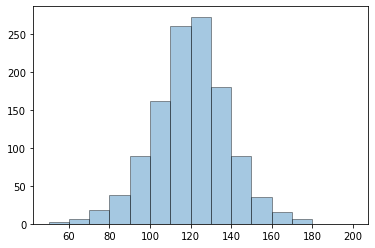

In [5]:
bw_bins = range(50, 201, 10)
plt.hist(smoking_and_birthweight['Birth Weight'], bins=bw_bins, alpha=0.4);

In [7]:
sm_bweights = smoking_and_birthweight.loc[smoking_and_birthweight['Maternal Smoker']==True,'Birth Weight']
nsm_bweights = smoking_and_birthweight.loc[smoking_and_birthweight['Maternal Smoker']==False,'Birth Weight']

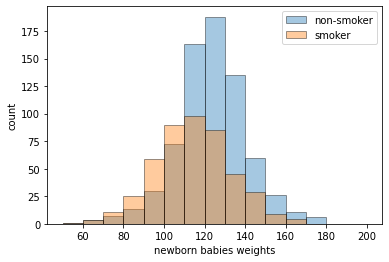

In [8]:
plt.hist(nsm_bweights, bins=bw_bins, label='non-smoker', alpha=0.4)
plt.hist(sm_bweights, bins=bw_bins, label='smoker', alpha=0.4)
plt.xlabel('newborn babies weights')
plt.ylabel('count')
plt.legend();

## Permutation test for two group mean

In [9]:
# average birth weight for each group
observed_means = smoking_and_birthweight.groupby(by='Maternal Smoker').mean()
observed_means

,Birth Weight
Maternal Smoker,
False,123.085315
True,113.819172


In [10]:
# difference of average birth weight for each group
observed_diff = observed_means.loc[False, 'Birth Weight'] - observed_means.loc[True, 'Birth Weight']
observed_diff

9.266142572024918

In [11]:
# a function that group baby weights by maternal smoker indicator 
# and calculate difference between group means (non-smoker - smoker)
def diff_between_group_means(df):
    means = df.groupby(by = 'Maternal Smoker').mean()
    return means.loc[False, 'Birth Weight'] - means.loc[True, 'Birth Weight']

### Plan for purmutation test:
- Shuffle group labels
- Assign some to group A and some to group B
- Find difference between averages of the two shuffled groups (statistic)
- Repeat and generate sampling distribution of the difference under $H_0$

In [12]:
smoking = smoking_and_birthweight['Maternal Smoker']
smoking

0       False
1       False
2        True
3        True
4       False
        ...  
1169    False
1170    False
1171     True
1172    False
1173    False
Name: Maternal Smoker, Length: 1174, dtype: bool

In [13]:
# np.random.permutation function does the random shuffle
shuffled_smoking = np.random.permutation(smoking)
shuffled_smoking

array([False,  True, False, ..., False,  True,  True])

In [14]:
# take out the original birth weight column as a df
shuffled = smoking_and_birthweight[['Birth Weight']]
# add the shuffled label as a new column
shuffled['Maternal Smoker Shuffled'] = shuffled_smoking
# now you have a new df with group label shuffled
shuffled

,Birth Weight,Maternal Smoker Shuffled
0,120,False
1,113,True
2,128,False
3,108,True
4,136,False
...,...,...
1169,113,True
1170,128,True
1171,130,False
1172,125,True


In [15]:
# calculate average birth weights for the shuffled groups
df1 = shuffled.groupby(by='Maternal Smoker Shuffled').mean()
df1

,Birth Weight
Maternal Smoker Shuffled,
False,119.683916
True,119.117647


In [16]:
# calculate the difference of average birth weights for the shuffled groups
df1.loc[False, 'Birth Weight'] - df1.loc[True, 'Birth Weight']

0.5662690250925522

In [17]:
# put all together to do repeat many times for the simulation
simu_diffs = []
rep=10000

for i in np.arange(rep):
    # shuffle group label
    shuffled_smoking = np.random.permutation(smoking_and_birthweight['Maternal Smoker'])
    # create shuffled df
    shuffled = smoking_and_birthweight[['Birth Weight']]
    shuffled['Maternal Smoker Shuffled'] = shuffled_smoking
    # group shuffled df with respect to shuffled group labels
    group_df = shuffled.groupby(by='Maternal Smoker Shuffled').mean()
    # calculated simulated diff
    diff = group_df.loc[False, 'Birth Weight'] - group_df.loc[True, 'Birth Weight']
    # append one simulated diff
    simu_diffs = np.append(simu_diffs, diff)


In [18]:
simu_diffs

array([ 2.14741381,  0.00464068,  2.49440712, ..., -0.7215412 ,
       -0.07763609, -1.51211359])

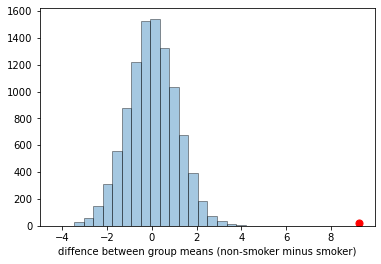

In [19]:
plt.hist(simu_diffs, bins=20, alpha=0.4)
plt.scatter(observed_diff, 20, color = 'red', s=50)
plt.xlabel('diffence between group means (non-smoker minus smoker)');

In [20]:
np.mean(simu_diffs >= observed_diff)

0.0

In [21]:
cut_off = np.percentile(simu_diffs, 95)
cut_off

1.814729497082439

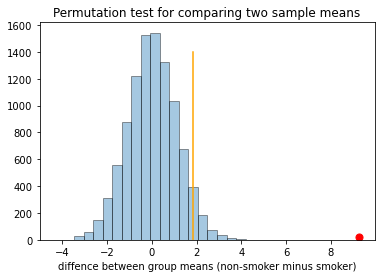

In [22]:
plt.hist(simu_diffs, bins=20, alpha=0.4)
plt.plot([cut_off,cut_off],[0,1400], color='orange')
plt.scatter(observed_diff, 20, color = 'red', s=50)
plt.title('Permutation test for comparing two sample means')
plt.xlabel('diffence between group means (non-smoker minus smoker)');

## Permutation test for correlation

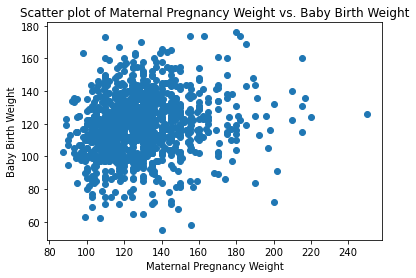

In [23]:
# baby weights vs. maternal pregnancy weight
plt.scatter(data=baby, x='Maternal Pregnancy Weight', y='Birth Weight')
plt.title('Scatter plot of Maternal Pregnancy Weight vs. Baby Birth Weight')
plt.xlabel('Maternal Pregnancy Weight')
plt.ylabel('Baby Birth Weight');

[`numpy.corrcoef()`](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) will calculate the correlation coefficient matrix. Similarly, [`df.corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) will do the same thing for your entire dataframe.

In [ ]:
# calculate the correlation
# output of np.corrcoef is a 2x2 matrix, only need one off diagonal value
obs_corr = np.corrcoef(baby['Maternal Pregnancy Weight'], baby['Birth Weight'])[0,1]
obs_corr

In [ ]:
# permutation test
simu_corr=[]

rep=10000

for i in np.arange(rep):
    # shuffle the baby weights (or the mother weights)
    shuffled = np.random.permutation(baby['Birth Weight'])
    # calculat the simulated corr 
    corr = np.corrcoef(baby['Maternal Pregnancy Weight'], shuffled)[0,1]
    # append one simulated corr
    simu_corr = np.append(simu_corr, corr)

In [ ]:
# H_a is that there is a positive correlation
# p-value for 1-sided test
np.mean(simu_corr >= obs_corr)
# cut off of right tail
cut_off = np.percentile(simu_corr, 95)

In [ ]:
plt.hist(simu_corr, bins=20, alpha=0.4)
plt.plot([cut_off,cut_off],[0,1500], color='orange')
plt.scatter(obs_corr, 20, color = 'red', s=50)
plt.title('permutation test for correlation coef')
plt.xlabel('correlation coef between maternal pregnancy weight and birth weight');